In [2]:
import sys
import os

from path import Environment
from agent import QLearningTable


def update(max_episodes=100, stop_at_goal=False):
    # Resulted list for the plotting Episodes via Steps
    steps = []

    # Summed costs for all episodes in resulted list
    all_costs = []

    for episode in range(max_episodes):
        print('Episode ', episode, 'of', max_episodes)
        # Initial Observation
        observation = env.reset()

        # Updating number of Steps for each Episode
        i = 0

        # Updating the cost for each episode
        cost = 0

        while True:
            # Refreshing environment
            env.render()

            # RL chooses action based on observation
            action = q.choose_action(str(observation))

            # RL takes an action and get the next observation and reward
            observation_, reward, done = env.step(action)

            # RL learns from this transition and calculating the cost
            cost += q.learn(str(observation), action, reward, str(observation_))

            # Swapping the observations - current and next
            if done:
                print(observation_)
            observation = observation_

            # Calculating number of Steps in the current Episode
            i += 1

            # Break while loop when it is the end of current Episode
            # When agent reached the goal or obstacle
            if done:
                steps += [i]
                all_costs += [cost]
                break

    # Showing the final route
    env.final()

    # Showing the Q-table with values for each action
    q.print_q_table()

    # Plotting the results
    q.plot_results(steps, all_costs)


Episode  0 of 100
obstacle
Episode  1 of 100
obstacle
Episode  2 of 100
obstacle
Episode  3 of 100
obstacle
Episode  4 of 100
obstacle
Episode  5 of 100
obstacle
Episode  6 of 100
obstacle
Episode  7 of 100
obstacle
Episode  8 of 100
obstacle
Episode  9 of 100
obstacle
Episode  10 of 100
obstacle
Episode  11 of 100
obstacle
Episode  12 of 100
obstacle
Episode  13 of 100
obstacle
Episode  14 of 100
obstacle
Episode  15 of 100
obstacle
Episode  16 of 100
*********** GOOOOOOOOOOOOOOOOOOOOOOOOAL ****************
goal
Episode  17 of 100
obstacle
Episode  18 of 100
obstacle
Episode  19 of 100
obstacle
Episode  20 of 100
*********** GOOOOOOOOOOOOOOOOOOOOOOOOAL ****************
goal
Episode  21 of 100
obstacle
Episode  22 of 100
obstacle
Episode  23 of 100
obstacle
Episode  24 of 100
obstacle
Episode  25 of 100
obstacle
Episode  26 of 100
obstacle
Episode  27 of 100
*********** GOOOOOOOOOOOOOOOOOOOOOOOOAL ****************
goal
Episode  28 of 100
obstacle
Episode  29 of 100
obstacle
Episode  30

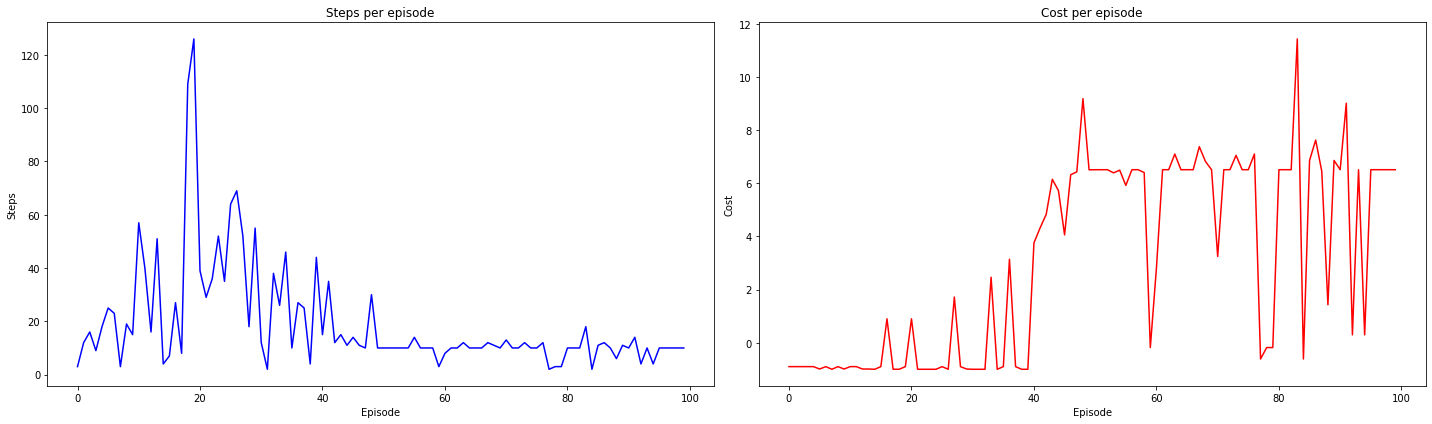

In [4]:
delay = None
episodes = 100
grid = (6, 8)
stop_at_goal = False
# for a in sys.argv[1:]:
#     if a == '-h' or a == '--help':
#         print('\nusage: python(3) main.py [delay=d][episodes=e][grid=RxC]\n')
#         sys.exit()
#     if a == '-s' or a == '--stop':
#         stop_at_goal = True
#         continue
#     opt, val = a.split('=')
#     if opt == '-d' or opt == '--delay':
#         delay = float(val)
#     if opt == '-e' or opt == '--episodes':
#         episodes = int(val)
#     if opt == '-g' or opt == '--grid':
#         grid = tuple(map(int, val.split('x')))

env = Environment(grid, delay, stop_at_goal)
q = QLearningTable(actions=list(range(env.n_actions)))
update(episodes)